### Data Description

**data_orders:**
- `order_datetime` - Time of the order
- `origin_longitude` - Longitude of the order
- `origin_latitude` - Latitude of the order
- `m_order_eta` - Time before order arrival
- `order_gk` - Order number
- `order_status_key` - Order status (Mapping: 
  - 4: Cancelled by client
  - 9: Cancelled by system)
- `is_driver_assigned_key` - Whether a driver has been assigned
- `cancellation_time_in_seconds` - Seconds passed before cancellation

**data_offers:**
- `order_gk` - Order number (associated with `order_gk` from `data_orders`)
- `offer_id` - ID of an offer


In [68]:
import pandas as pd

orders = pd.read_csv("data_orders.csv")
offers = pd.read_csv("data_offers.csv")

orders.head(), offers.head()

(  order_datetime  origin_longitude  origin_latitude  m_order_eta  \
 0       18:08:07         -0.978916        51.456173         60.0   
 1       20:57:32         -0.950385        51.456843          NaN   
 2       12:07:50         -0.969520        51.455544        477.0   
 3       13:50:20         -1.054671        51.460544        658.0   
 4       21:24:45         -0.967605        51.458236          NaN   
 
         order_gk  order_status_key  is_driver_assigned_key  \
 0  3000583041974                 4                       1   
 1  3000583116437                 4                       0   
 2  3000582891479                 4                       1   
 3  3000582941169                 4                       1   
 4  3000583140877                 9                       0   
 
    cancellations_time_in_seconds  
 0                          198.0  
 1                          128.0  
 2                           46.0  
 3                           62.0  
 4                      

## Part 1

Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

In [69]:
orders.head(4)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0


In [70]:
orders_p1 = orders.groupby(by=["order_status_key", "is_driver_assigned_key"]).size()

orders_p1.index = orders_p1.index.set_levels([
    ['Cancelled by client', 'Cancelled by system'],
    ['No driver assigned', 'Driver assigned']
])

orders_p1

order_status_key     is_driver_assigned_key
Cancelled by client  No driver assigned        4496
                     Driver assigned           2811
Cancelled by system  No driver assigned        3406
                     Driver assigned              3
dtype: int64

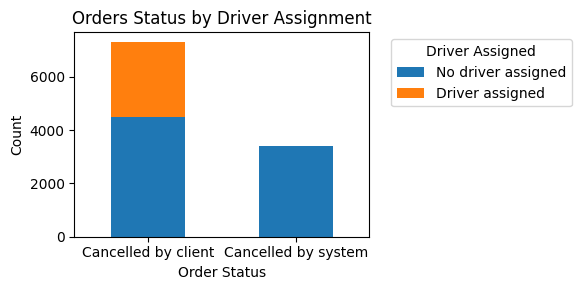

In [71]:
import matplotlib.pyplot as plt

# Re-create orders_p1 for clarity
orders_p1 = orders.groupby(by=["order_status_key", "is_driver_assigned_key"]).size()

# Rename index levels
orders_p1.index = orders_p1.index.set_levels([
    ['Cancelled by client', 'Cancelled by system'],
    ['No driver assigned', 'Driver assigned']
])

# Convert the Series to a DataFrame for easier plotting
orders_p1_df = orders_p1.unstack()

# Plotting
orders_p1_df.plot(kind='bar', stacked=True, figsize=(6, 3))
plt.title('Orders Status by Driver Assignment')
plt.xlabel('Order Status')
plt.ylabel('Count') 
plt.xticks(rotation=0)
plt.legend(title='Driver Assigned', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


With the analysis above, we can notice that "Cancelled by client : before driver assignment" has the highest number of orders

## Part 2

Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

In [72]:
orders.head(1)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0


In [73]:
orders["order_hour"] = orders["order_datetime"].apply(lambda x: pd.to_datetime(x).hour)
orders

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,order_hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,20
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,21
...,...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0,13
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0,13
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,13
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0,13


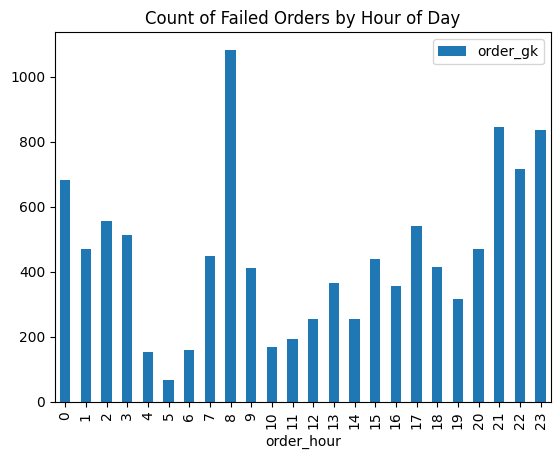

In [74]:
_ = orders.groupby(by="order_hour")["order_gk"].count().plot(
    kind="bar",
    legend=True, 
    xticks=range(0,24),
    title="Count of Failed Orders by Hour of Day"
    )

In [75]:
import numpy as np

orders["is_driver_assigned"] = np.where(orders["is_driver_assigned_key"] == 0, "No", "Yes")
orders["order_status"] = np.where(orders["order_status_key"] == 4, "Cancelled by Client", "Cancelled by System")
orders.drop(columns=["order_status_key", "is_driver_assigned_key"], inplace=True)

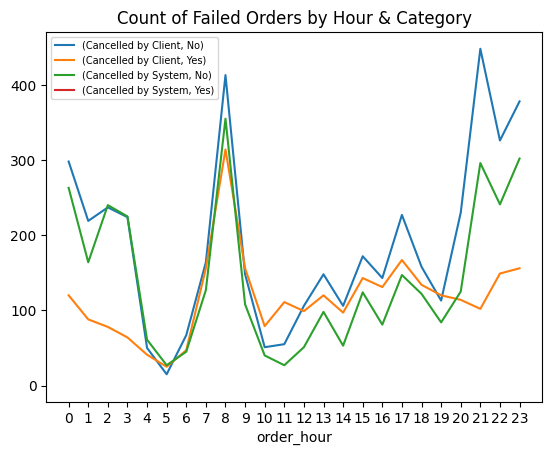

In [82]:
from matplotlib import pyplot as plt

_ = orders.groupby(by=["order_hour","order_status","is_driver_assigned"])["order_gk"].count().reset_index() \
    .pivot(index= "order_hour", 
        columns=["order_status", "is_driver_assigned"],
        values="order_gk"
        ) \
    .plot(
    kind="line",
    legend=True, 
    xticks=range(0,24),
    title="Count of Failed Orders by Hour & Category"
    )

plt.legend(prop={'size': 7})

plt.show()

In [ ]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,order_hour,is_driver_assigned,order_status
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18,Yes,Cancelled by Client
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,20,No,Cancelled by Client
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12,Yes,Cancelled by Client
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13,Yes,Cancelled by Client
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,21,No,Cancelled by System


## Part 3

Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?


In [85]:
orders["cancellations_time_in_seconds"].describe()

count    7307.000000
mean      157.892021
std       213.366963
min         3.000000
25%        45.000000
50%        98.000000
75%       187.500000
max      4303.000000
Name: cancellations_time_in_seconds, dtype: float64

In [86]:
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)


outlier = orders["cancellations_time_in_seconds"].apply(detect_outliers)

outlier

AttributeError: 'float' object has no attribute 'quantile'